In [1]:
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from tqdm import tqdm

In [7]:
mat1 = np.load(r"..\matrices\isolated-materials\float32\Material1.npy")
mat2 = np.load(r"..\matrices\isolated-materials\float32\Material2.npy")
mat3 = np.load(r"..\matrices\isolated-materials\float32\Material3.npy")
tran1 = np.load(r"..\matrices\isolated-materials\float32\Transition1.npy")
tran2 = np.load(r"..\matrices\isolated-materials\float32\Transition2.npy")
clone1 = np.load(r"..\matrices\isolated-materials\float32\T1LABEL.npy")
clone2 = np.load(r"..\matrices\isolated-materials\float32\T2LABEL.npy")

In [3]:
th_mat1 = (mat1 > 10765)
th_mat2 = (mat2 > 10760)
th_mat3 = (mat3 > 11070)

In [4]:
full_mat = np.zeros((1085, 1085, 1789), dtype=np.uint8)
full_mat[:,:,41:281] = th_mat1
full_mat[:,:,770:1021] = th_mat2*2
full_mat[:,:,1520:1766] = th_mat3*3

In [44]:
# P1 = 1030,480,430
# P2 = 750,940,430
# P3 = 85,563,60
V1 = np.array([750-1030,940-480,430-430])
V2 = np.array([85-1030,563-480,60-430])
print(V1.shape)
CF = np.cross(V1,V2)
print(CF)

(3,)
[-170200 -103600  411460]


In [45]:
clone1 = tran1.copy()
for i in range(tran1.shape[0]):
    for j in range(tran1.shape[1]):
        for k in range(tran1.shape[2]):
            if clone1[i,j,k] < 10760:
                clone1[i,j,k]=0
                continue
            if -170200*i - 103600*j + 411460*k <= -48106200:
                clone1[i,j,k] = 2
            else:
                clone1[i,j,k] = 1

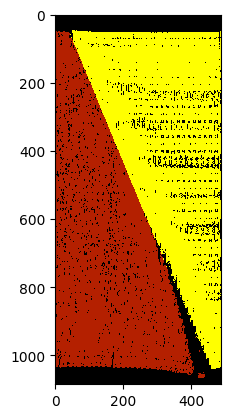

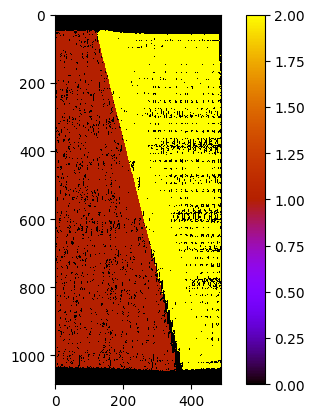

In [59]:
plt.imshow(clone1[:,1085//2,:], interpolation='nearest', cmap='gnuplot')
plt.show()
plt.imshow(clone1[543,:,:], interpolation='nearest', cmap='gnuplot')
plt.colorbar()
plt.show()

In [55]:
clone1 = np.load(r"..\matrices\isolated-materials\float32\T1LABEL.npy")

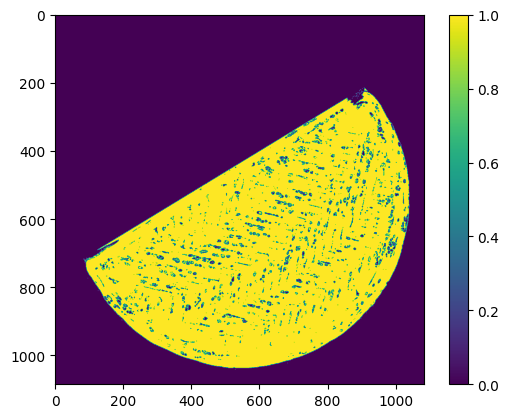

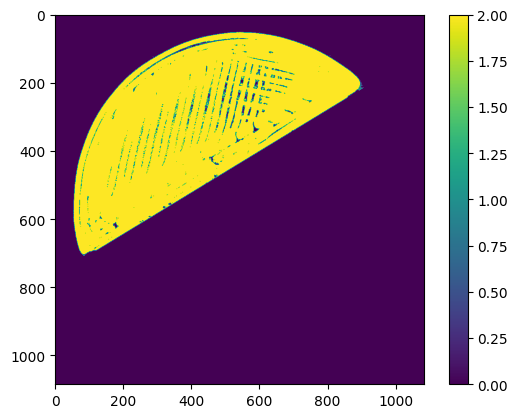

In [56]:
c1 = clone1.copy()
c1 = (clone1 == 2)*clone1 / 2
clone1 = (clone1 == 1)*clone1 * 2
plt.imshow(c1[:,:,200])
plt.colorbar()
plt.show()
plt.imshow(clone1[:,:,200])
plt.colorbar()
plt.show()

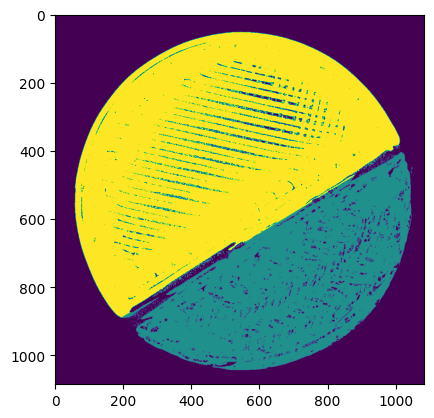

In [57]:
clone1 = clone1 + c1
plt.imshow(clone1[:,:,300])
plt.show()

In [58]:
np.save(r"..\matrices\isolated-materials\float32\T1LABEL.npy", clone1)

In [84]:
# 83 425 20
# 992 716 480
# 215 518 100
V1 = np.array([992-83, 716-425, 480-20])
V2 = np.array([215-83, 518-425, 100-20])
print(V1.shape)
CF = np.cross(V1,V2)
print(CF)

(3,)
[-19500 -12000  46125]


In [87]:
clone2 = tran2.copy()
with tqdm(total=tran2.size) as pbar:
    for i in range(tran2.shape[0]):
        for j in range(tran2.shape[1]):
            for k in range(tran2.shape[2]):
                pbar.update(1)
                if clone2[i,j,k] < 10760:
                    clone2[i,j,k]=0
                    continue
                if -19500*i - 12000*j + 46125*k <= -5796000:
                    clone2[i,j,k] = 2
                else:
                    clone2[i,j,k] = 3
    pbar.close()

100%|██████████| 587435275/587435275 [22:06<00:00, 443001.84it/s]  


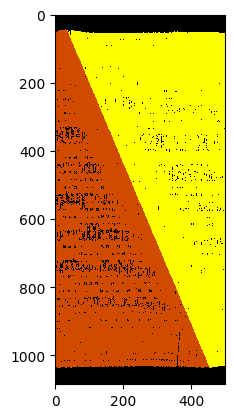

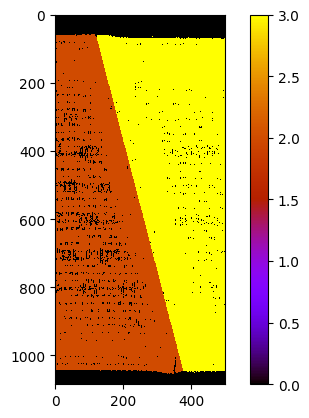

In [88]:
plt.imshow(clone2[:,1085//2,:], interpolation='nearest', cmap='gnuplot')
plt.show()
plt.imshow(clone2[543,:,:], interpolation='nearest', cmap='gnuplot')
plt.colorbar()
plt.show()

In [89]:
np.save(r"..\matrices\isolated-materials\float32\T2LABEL.npy", clone2)

In [8]:
th_mat1 = (mat1 > 10765)
th_mat2 = (mat2 > 10760)
th_mat3 = (mat3 > 11070)

print(clone1.shape)
print(clone2.shape)

full_mat = np.zeros((1085, 1085, 1789), dtype=np.uint8)

full_mat[:,:,41:281] = th_mat1
full_mat[:,:,770:1021] = th_mat2*2
full_mat[:,:,1520:1766] = th_mat3*3
full_mat[:,:,281:770] = clone1
full_mat[:,:,1021:1520] = clone2

(1085, 1085, 489)
(1085, 1085, 499)


In [14]:
del clone1
del clone2
del mat1
del mat2
del mat3
del tran1
del tran2

In [15]:
bg = np.load(r"..\matrices\NORMALIZED-RP-STACK.npy")

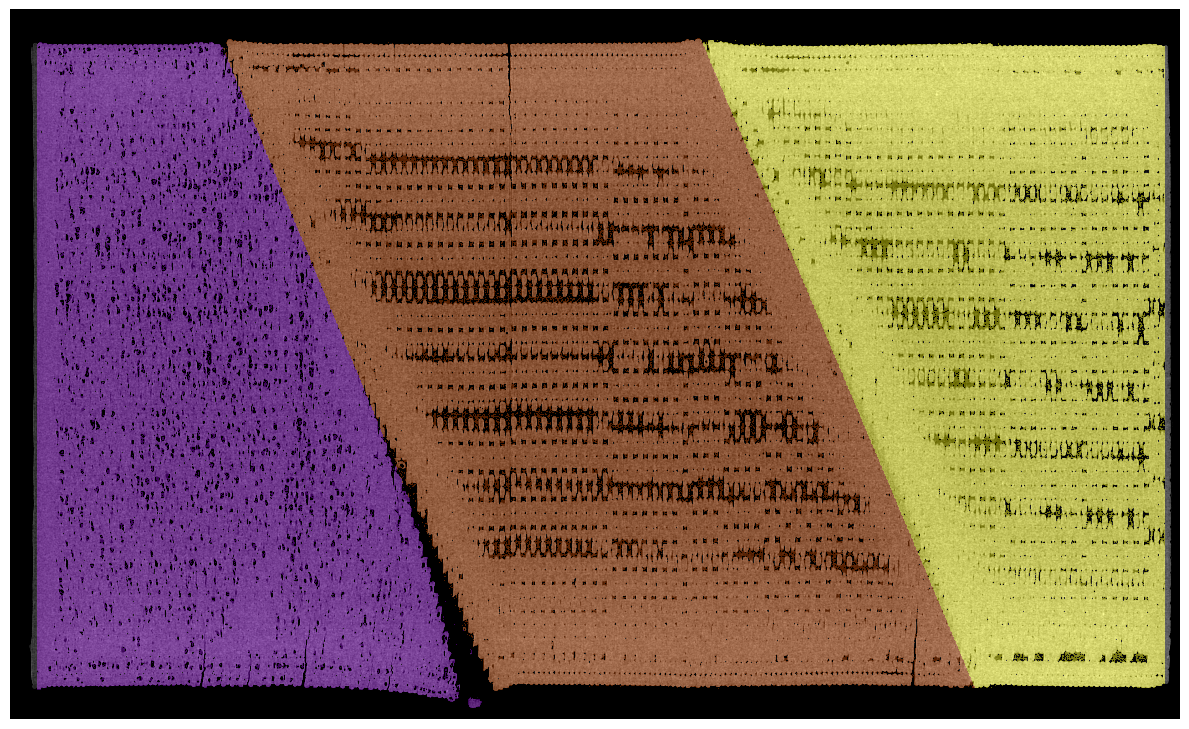

In [27]:
fig, ax= plt.subplots(1)
fig.set_size_inches(12,8)
ax.imshow(full_mat[:, 543, :], interpolation='nearest', cmap='gnuplot')
ax.imshow(bg[:,543,:], cmap='gray', vmin=100, alpha=0.6)

ax.axis(False)
fig.tight_layout()
plt.show()

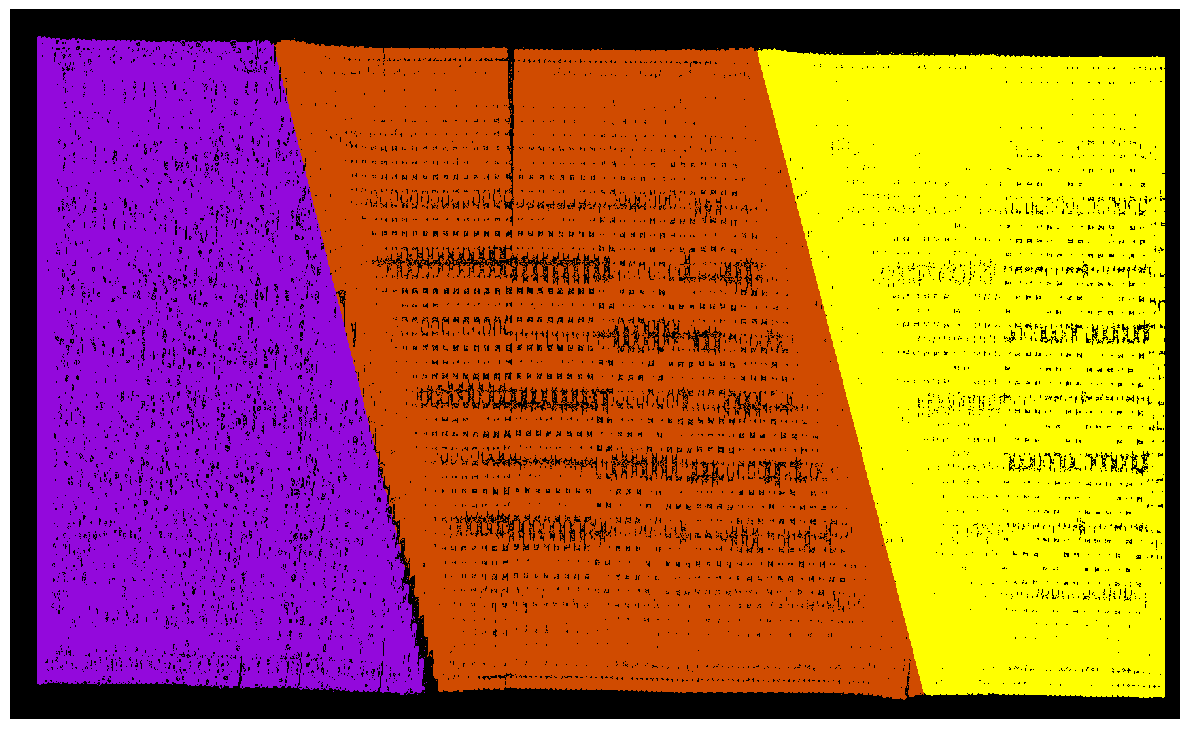

In [10]:
fig, ax= plt.subplots(1)
fig.set_size_inches(12,8)
ax.imshow(full_mat[543, :, :], interpolation='nearest', cmap='gnuplot')
ax.axis(False)
fig.tight_layout()
plt.show()

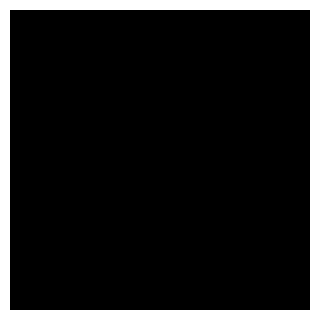

In [38]:
import matplotlib.animation as anim
fig, ax = plt.subplots()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
fig.set_size_inches(3, 3, forward=True)

im0 = ax.imshow(full_mat[:,:,0], animated=True, vmin=0, vmax=3, cmap='gnuplot', interpolation='nearest')
im1 = ax.imshow(bg[:,:,0], animated=True, vmin=100, vmax=255, cmap='gray', alpha=0.75)

def update(i):
    im0.set_array(full_mat[:,:,i])
    im1.set_array(bg[:,:,i])
    return im0, im1

anim_fig = anim.FuncAnimation(fig, update, frames=np.linspace(0,1788,480, dtype=np.uint16), interval = 16.667, blit=True, repeat_delay=100,)
plt.axis(False)
plt.show()

anim_fig.save("z.gif")